# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [6]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

def regression(xs, ys):
    
    slope = ((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) / (np.mean(xs)**2 - np.mean(xs**2))
    intercept = np.mean(ys) - slope * np.mean(xs)
    
    ys_predicted = slope*xs + intercept
    
    ys_mean = np.mean(ys)
    ssr = np.sum((ys - ys_predicted)**2)
    sst = np.sum((ys - ys_mean)**2)
    r_sq = 1 - ssr/sst
    
    return slope, intercept, r_sq


In [7]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

m, c, r2 = regression(X, Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-intercept: 6.33
R-squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


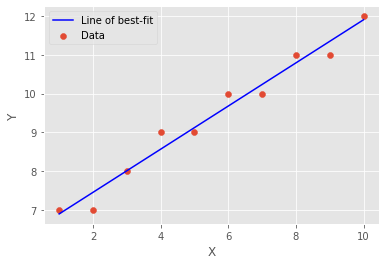

In [19]:
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:', round(m, 2))
print('Y-intercept:', round(c, 2))
print('R-squared:', round(r2, 2))
print('----------------------------')
print(f"Model: Y = {round(m, 2)} * X + {round(c, 2)}")

regression_line = m*X + c

plt.scatter(X, Y, label='Data')
plt.plot(X, regression_line, color='blue', label='Line of best-fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [20]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

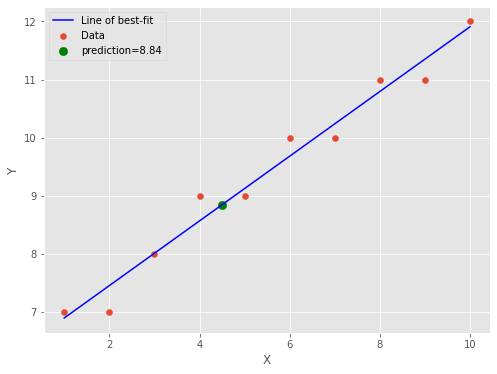

In [23]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_predicted = m*x_new + c

plt.figure(figsize=(8,6))
plt.scatter(X, Y, label='Data')
plt.plot(X, regression_line, c='blue', label='Line of best-fit')
plt.scatter(x_new, y_predicted, c='green', label=f'prediction={round(y_predicted,2)}', s=70)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y.

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-intercept: -204.48
R-squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


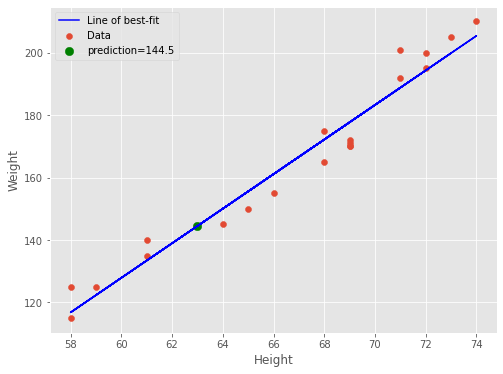

In [42]:
#Level-Up
import pandas as pd

df = pd.read_csv("heightweight.csv")
df.head()
height = np.array(df['height'])
weight = np.array(df['weight'])
weight

dm, dc, dr2 = regression(height, weight)

print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:', round(dm, 2))
print('Y-intercept:', round(dc, 2))
print('R-squared:', round(dr2, 2))
print('----------------------------')
print(f"Model: Y = {round(dm, 2)} * X + {round(dc, 2)}")

d_regression_line = dm*height + dc

dx_new = 63
dy_predicted = dm*dx_new + dc

plt.figure(figsize=(8,6))
plt.scatter(height, weight, label='Data')
plt.plot(height, d_regression_line, c='blue', label='Line of best-fit')
plt.scatter(dx_new, dy_predicted, c='green', label=f'prediction={round(dy_predicted,1)}', s=70)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 